<a href="https://www.kaggle.com/code/dascient/sports-bets-winning-algorithm?scriptVersionId=132748596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sports Bets Winning Algorithm

In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-scores-and-betting-data/nfl_stadiums.csv
/kaggle/input/nfl-scores-and-betting-data/nfl_teams.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke_scores.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke.R


In [131]:
stadiums = pd.read_csv("/kaggle/input/nfl-scores-and-betting-data/nfl_stadiums.csv",header=0,encoding='unicode_escape')
teams = pd.read_csv("/kaggle/input/nfl-scores-and-betting-data/nfl_teams.csv",header=0)
scores = pd.read_csv("/kaggle/input/nfl-scores-and-betting-data/spreadspoke_scores.csv",header=0)


#stadiums['stadium_weather_station_code'] = stadiums['stadium_weather_station_code'].astype('float')
#stadiums['stadium_capacity'] = stadiums['stadium_capacity'].astype('float')
stadiums['LATITUDE'] = stadiums['LATITUDE'].astype('float')
stadiums['LONGITUDE'] = stadiums['LONGITUDE'].astype('float')
stadiums['ELEVATION'] = stadiums['ELEVATION'].astype('float')


scores['schedule_date'] = scores['schedule_date'].astype('datetime64[ns]')
scores['schedule_season'] = scores['schedule_season'].astype('datetime64[ns]').dt.year
scores['weather_temperature'] = scores['weather_temperature'].astype('float')
scores['score_home'] = scores['score_home'].astype('float')
scores['score_away'] = scores['score_away'].astype('float')
scores['weather_temperature'] = scores['weather_temperature'].astype('float')
scores['weather_wind_mph'] = scores['weather_wind_mph'].astype('float')
scores['weather_humidity'] = scores['weather_humidity'].astype('float')
scores['schedule_season'] = scores['schedule_season'].astype('float')

# let's create some target variables
scores['winner'] = scores.loc[(scores['score_home'] > scores['score_away']),'winner']  = scores['team_home']

In [76]:
teams#[teams.team_name == 'Atlanta Falcons']

team_name team_name_short team_id team_id_pfr  \
0          Arizona Cardinals       Cardinals     ARI         CRD   
1            Atlanta Falcons         Falcons     ATL         ATL   
2            Baltimore Colts           Colts     IND         CLT   
3           Baltimore Ravens          Ravens     BAL         RAV   
4            Boston Patriots        Patriots      NE         NWE   
5              Buffalo Bills           Bills     BUF         BUF   
6          Carolina Panthers        Panthers     CAR         CAR   
7              Chicago Bears           Bears     CHI         CHI   
8         Cincinnati Bengals         Bengals     CIN         CIN   
9           Cleveland Browns          Browns     CLE         CLE   
10            Dallas Cowboys         Cowboys     DAL         DAL   
11            Denver Broncos         Broncos     DEN         DEN   
12             Detroit Lions           Lions     DET         DET   
13         Green Bay Packers         Packers      GB         GNB   
14            Houston Oilers          Oilers     TEN         OTI   
15            Houston Texans          Texans     HOU         HTX   
16        Indianapolis Colts           Colts     IND         CLT   
17      Jacksonville Jaguars         Jaguars     JAX         JAX   
18        Kansas City Chiefs          Chiefs      KC         KAN   
19         Las Vegas Raiders         Raiders     LVR         RAI   
20      Los Angeles Chargers        Chargers     LAC         SDG   
21       Los Angeles Raiders         Raiders     LVR         RAI   
22          Los Angeles Rams            Rams     LAR         RAM   
23            Miami Dolphins        Dolphins     MIA         MIA   
24         Minnesota Vikings         Vikings     MIN         MIN   
25      New England Patriots        Patriots      NE         NWE   
26        New Orleans Saints          Saints      NO         NOR   
27           New York Giants          Giants     NYG         NYG   
28             New York Jets            Jets     NYJ         NYJ   
29           Oakland Raiders         Raiders     LVR         RAI   
30       Philadelphia Eagles          Eagles     PHI         PHI   
31         Phoenix Cardinals       Cardinals     ARI         CRD   
32       Pittsburgh Steelers        Steelers     PIT         PIT   
33        San Diego Chargers        Chargers     LAC         SDG   
34       San Francisco 49ers           49ers      SF         SFO   
35          Seattle Seahawks        Seahawks     SEA         SEA   
36       St. Louis Cardinals       Cardinals     ARI         ARI   
37            St. Louis Rams            Rams     LAR         RAM   
38      Tampa Bay Buccaneers      Buccaneers      TB         TAM   
39          Tennessee Oilers          Oilers     TEN         OTI   
40          Tennessee Titans          Titans     TEN         OTI   
41     Washington Commanders      Washington     WAS         WAS   
42  Washington Football Team      Washington     WAS         WAS   
43       Washington Redskins      Washington     WAS         WAS   

   team_conference team_division team_conference_pre2002 team_division_pre2002  
0              NFC      NFC West                     NFC              NFC West  
1              NFC     NFC South                     NFC              NFC West  
2              AFC           NaN                     AFC              AFC East  
3              AFC     AFC North                     AFC           AFC Central  
4              AFC           NaN                     AFC                   NaN  
5              AFC      AFC East                     AFC              AFC East  
6              NFC     NFC South                     NFC              NFC West  
7              NFC     NFC North                     NFC           NFC Central  
8              AFC     AFC North                     AFC           AFC Central  
9              AFC     AFC North                     AFC           AFC Central  
10             NFC      NFC East                     NFC           

/tmp/ipykernel_33/2151642176.py:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



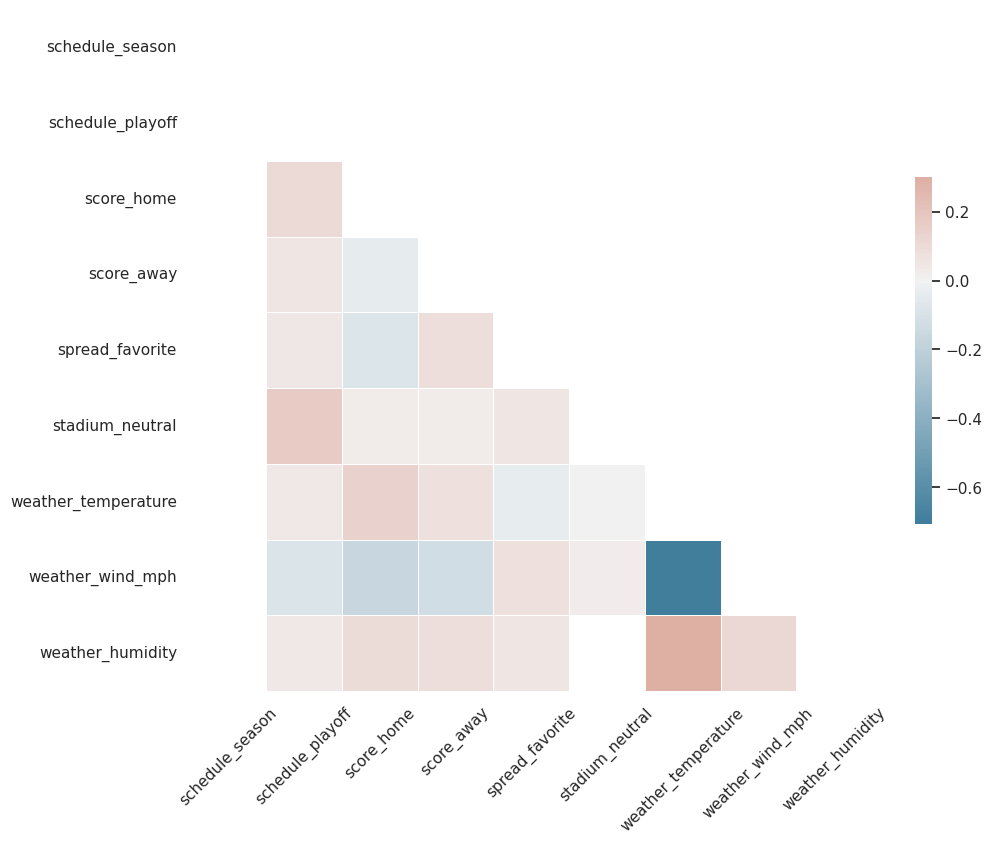

In [122]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

atlanta = scores[scores.team_home == 'Atlanta Falcons'].sort_values('schedule_date',ascending=False).reset_index(drop=True)

sns.set_theme(style="white")


# Compute the correlation matrix
corr = atlanta.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_33/3582992930.py:15: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



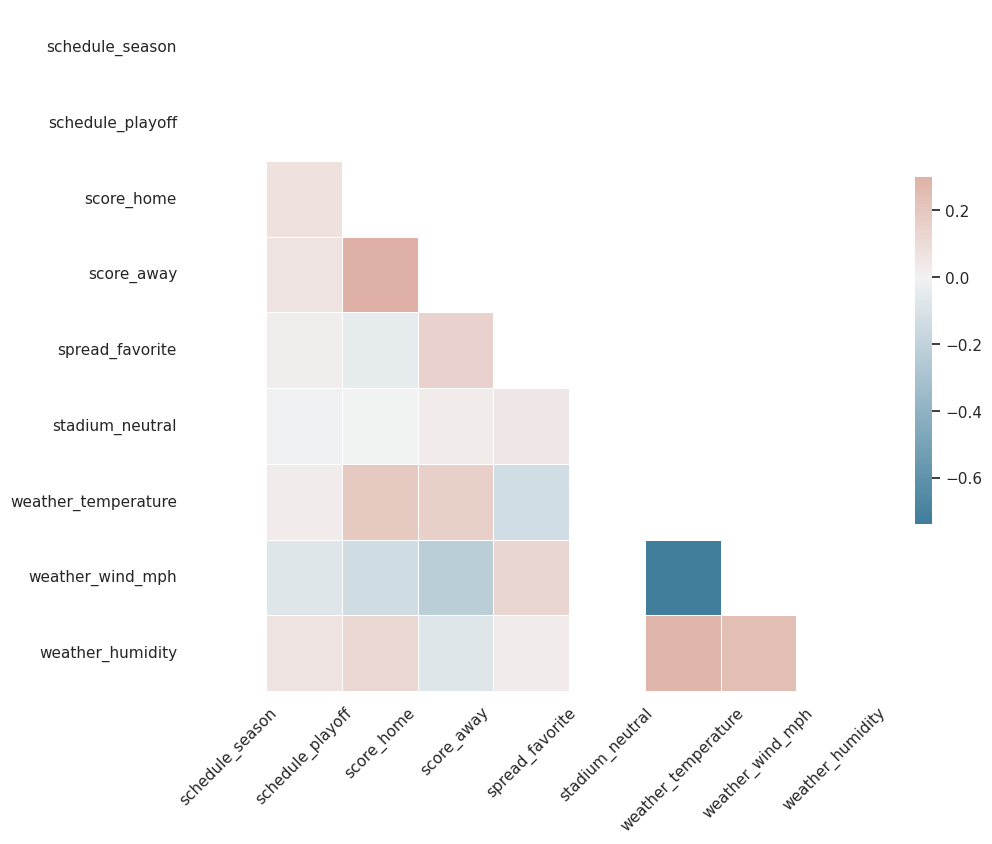

In [123]:
# When do the Falcons win?

atlanta_wins = atlanta[atlanta.score_home > atlanta.score_away]

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = atlanta_wins.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45)
plt.show()


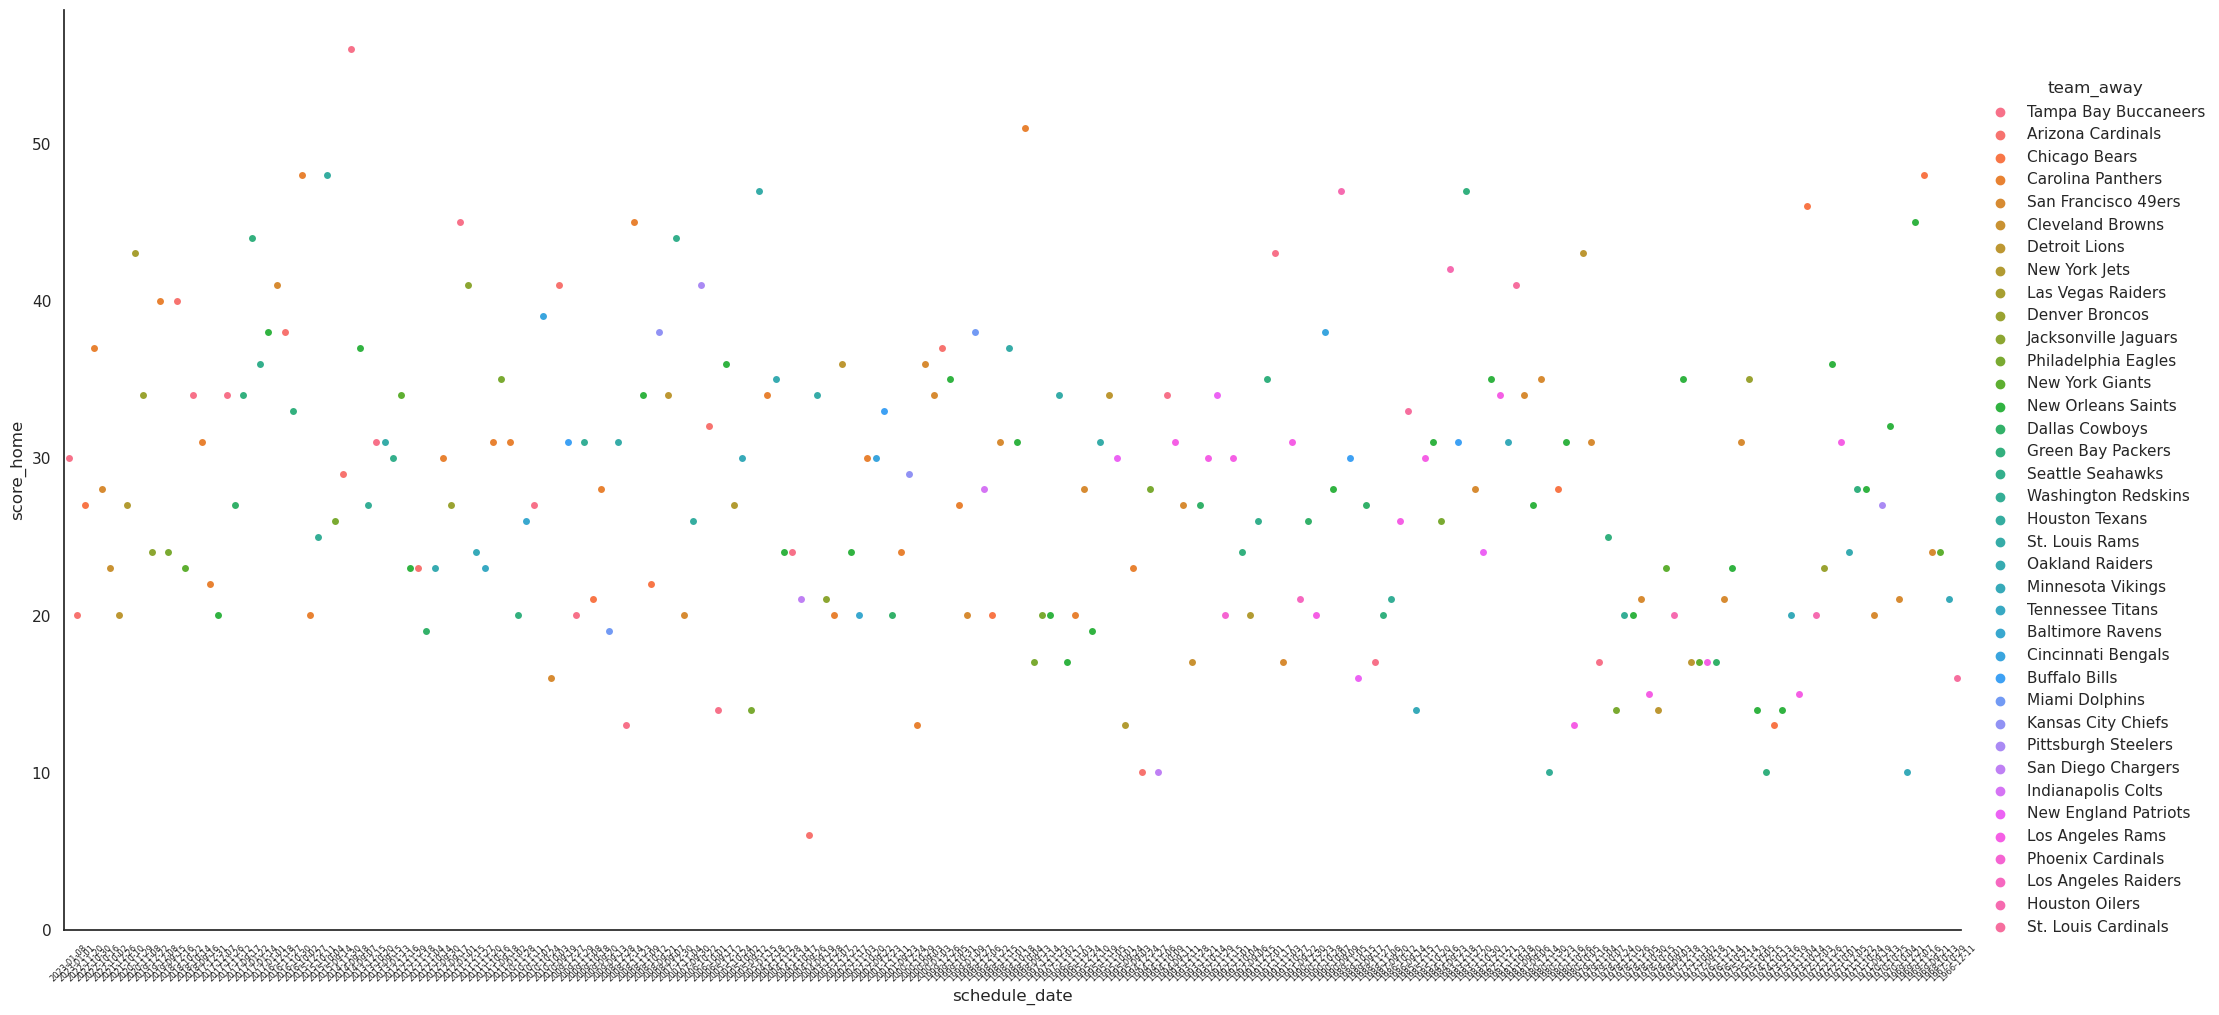

In [125]:

plt.rcParams["xtick.labelsize"] = 6
# plot a sample of 100 observations that lasted under 60 minutes
# need to get a smaller sample of city-set, the x-axis is way too muddled.
sns.catplot(data=atlanta_wins.head(500), x="schedule_date", 
            y="score_home", 
            hue="team_away", 
            kind="swarm", 
            height=10, 
            aspect=2, 
            #size='score_away',
            #size_max=20
           )
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.show()

In [135]:
scores.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail', 'winner'],
      dtype='object')

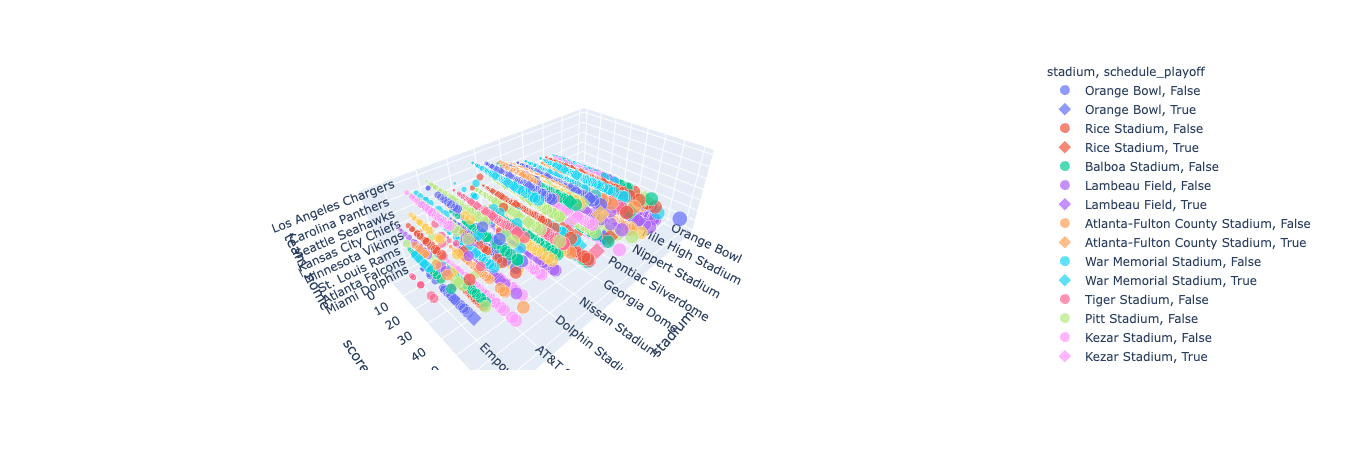

In [143]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.scatter_3d(scores, z='team_home', y='score_home', x='stadium',
              color='stadium',
              size = 'score_home',
              symbol = 'schedule_playoff',
              #hover_name = 'shape',
              hover_data=['winner','schedule_date','weather_humidity','weather_detail','score_away','team_away'],
              opacity=0.7,
              size_max=25
                    
                   )
fig.show()

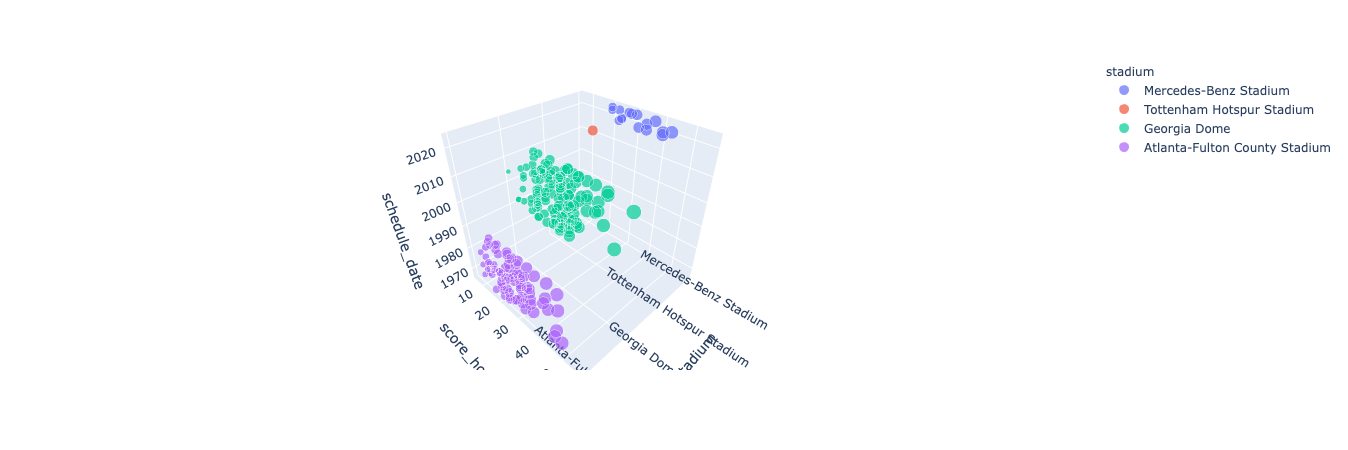

In [146]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.scatter_3d(atlanta_wins, z='schedule_date', y='score_home', x='stadium',
              color='stadium',
              size = 'score_home',
              #symbol = 'schedule_playoff',
              #hover_name = 'shape',
              hover_data=['winner','schedule_date','weather_humidity','weather_detail','score_away','team_away'],
              opacity=0.7,
              size_max=25
                    
                   )
fig.show()

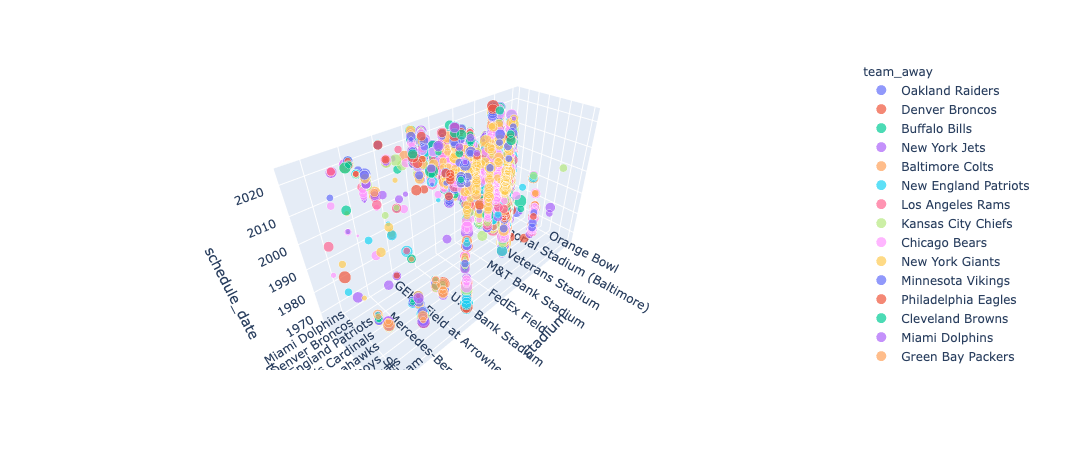

In [149]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.scatter_3d(scores, z='schedule_date', y='team_home', x='stadium',
              color='team_away',
              size = 'score_home',
              #symbol = 'stadium',
              hover_data=['winner','schedule_date','weather_humidity','weather_detail','score_away','team_away'],
              opacity=0.7,
              size_max=25
                    
                   )
fig.show()

In [147]:
scores

schedule_date  schedule_season schedule_week  schedule_playoff  \
0        1966-09-02           1970.0             1             False   
1        1966-09-03           1970.0             1             False   
2        1966-09-04           1970.0             1             False   
3        1966-09-09           1970.0             2             False   
4        1966-09-10           1970.0             1             False   
...             ...              ...           ...               ...   
13511    2023-01-22           1970.0      Division              True   
13512    2023-01-22           1970.0      Division              True   
13513    2023-01-29           1970.0    Conference              True   
13514    2023-01-29           1970.0    Conference              True   
13515    2023-02-12           1970.0     Superbowl              True   

                 team_home  score_home  score_away            team_away  \
0           Miami Dolphins        14.0        23.0      Oakland Raiders   
1           Houston Oilers        45.0         7.0       Denver Broncos   
2       San Diego Chargers        27.0         7.0        Buffalo Bills   
3           Miami Dolphins        14.0        19.0        New York Jets   
4        Green Bay Packers        24.0         3.0      Baltimore Colts   
...                    ...         ...         ...                  ...   
13511        Buffalo Bills        10.0        27.0   Cincinnati Bengals   
13512  San Francisco 49ers        19.0        12.0       Dallas Cowboys   
13513   Kansas City Chiefs        23.0        20.0   Cincinnati Bengals   
13514  Philadelphia Eagles        31.0         7.0  San Francisco 49ers   
13515  Philadelphia Eagles        35.0        38.0   Kansas City Chiefs   

      team_favorite_id  spread_favorite over_under_line  \
0                  NaN              NaN             NaN   
1                  NaN              NaN             NaN   
2                  NaN              NaN             NaN   
3                  NaN              NaN             NaN   
4                  NaN              NaN             NaN   
...                ...              ...             ...   
13511              BUF             -6.0            48.5   
13512               SF             -3.5            46.5   
13513               KC             -1.5              48   
13514              PHI             -2.5            45.5   
13515              PHI             -1.0              51   

                               stadium  stadium_neutral  weather_temperature  \
0                          Orange Bowl            False                 83.0   
1                         Rice Stadium            False                 81.0   
2                       Balboa Stadium            False                 70.0   
3                          Orange Bowl            False                 82.0   
4                        Lambeau Field            False                 64.0   
...                                ...              ...                  ...   
13511                 Highmark Stadium            False                 32.0   
13512                   Levi's Stadium            False                 55.0   
13513  GEHA Field at Arrowhead Stadium            False                 22.0   
13514          Lincoln Financial Field            False                 52.0   
13515               State Farm Stadium             True                 76.0   

       weather_wind_mph  weather_humidity           weather_detail  \
0                   6.0              71.0                      NaN   
1                   7.0              70.0                      NaN   
2                   7.0              82.0                      NaN   
3                  11.0              78.0                      NaN   
4                   8.0              62.0                      NaN   
...                 ...               ...                      ...   
13511               4.0             100.0                     snow   
13512     

# Predictions

In [170]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# encoding
from sklearn.preprocessing import LabelEncoder

def encode(df):
    lb_make = LabelEncoder()
    columns = df.columns.values.tolist()
    df_encoded = df[columns].copy()

    # categorize/encode
    for i in columns:
        df_encoded[i] = lb_make.fit_transform(df[i])

    # encoded
    return df_encoded


# encoded variable re-mapping
def encoding_remap(df, df_encoded, target):
    
    X_test = X_y_sets(df, target)[0][0]
    
    remap = pd.merge(df_encoded.loc[df_encoded.index.isin(X_test.index.values)][target].reset_index(),
              df.loc[df.index.isin(X_test.index.values)][[target]].reset_index(),on=['index'])
    
    remap[target] = [str(remap[f'{target}_y'][i]) for i,v in remap[f'{target}_x'].items()]
    remap['index'] = np.array([str(remap[f'{target}_x'][i]) for i,v in remap[f'{target}_x'].items()]).astype(int)
    remap=remap[[target,'index']]
    remap = remap.set_index('index').drop_duplicates().sort_values('index')
    
    return remap


# pairplot
import seaborn as sns
def pairplot(df, target):
    return sns.pairplot(df.sample(int(len(df/10000))),hue=target)
    
    
# create X,y variables for ML
from sklearn.model_selection import train_test_split
def X_y_sets(df, target):
    X = df.dropna().drop(columns=[target]).copy()
    y = df.dropna()[target].ravel().copy()
    
    return train_test_split(X, y, test_size=0.33, random_state=42), X, y

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# classifier iteration
def classification_feat_importance(df_encoded):
    
    # iterate through each column variable as classification targets
    for target in df_encoded.columns.values:
        X = df_encoded.drop(columns=[target]).copy()
        y = df_encoded[target].ravel().copy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
    
        # classifiers
        #clf1 = GradientBoostingClassifier(criterion="friedman_mse", init=None, learning_rate=0.3338, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)
        #clf2 = GradientBoostingClassifier(criterion="squared_error", init=None, learning_rate=0.2222, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)
        clf3 = RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=42).fit(X_train, y_train)
        clf4 = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        clf5 = AdaBoostClassifier(n_estimators=8000, random_state=42).fit(X_train, y_train)
        clf6 = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
        clf7 = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
        classifiers = [
                       #clf1, 
                       #clf2, 
                       clf3, 
                       clf4, 
                       clf5,
                       clf6,
                       #clf7
                      ]

        for classifier in classifiers:
            results = []
            results.append({"classifier":str(classifier).split("(")[0],"target":target,"test_score":classifier.score(X_test, y_test)})
            for i in results:
                if target == 'verified':
                    print("\nClassifier:",str(classifier).split("(")[0],"\nTarget:",target,"\nScore:",classifier.score(X_test, y_test))
        
        test_matrix = confusion_matrix(y_test, clf.predict(X_test)) 
        results = pd.DataFrame(results)
        
    return results,test_matrix

print("To analyze which target-classifier would yield the best results: \nUncomment (#) the code below.")

To analyze which target-classifier would yield the best results: 
Uncomment (#) the code below.


In [171]:
# is scaling necessary?
# construction of ML dataframes
target = 'winner'

# copy
a = scores.copy()

# for the sake of computationa efficiency
a = a

In [172]:
# find random sample & save index for defining an encoded use-case
from random import randrange
idx = randrange(len(a))

# print random configuration item
print("\nThis is a randomly chosen subject we will try to predict.")
b = pd.DataFrame(a.loc[idx]).T
print(f"\nTarget:'{target}' value is: ",b.reset_index()[target][0],"\n")

# store sol'n
solution = str(b.reset_index()[target][0])

# print data point
b
# if this cell fails, try it again from step 1 - you ran into a null variable (i'll fix that soon enough)



This is a randomly chosen subject we will try to predict.

Target:'winner' value is:  Kansas City Chiefs 



schedule_date schedule_season schedule_week schedule_playoff  \
9328    2007-11-04          1970.0             9            False   

               team_home score_home score_away          team_away  \
9328  Kansas City Chiefs       22.0       33.0  Green Bay Packers   

     team_favorite_id spread_favorite over_under_line            stadium  \
9328               KC            -2.5            37.5  Arrowhead Stadium   

     stadium_neutral weather_temperature weather_wind_mph weather_humidity  \
9328           False                50.0             10.0             45.0   

     weather_detail              winner  
9328            NaN  Kansas City Chiefs

In [173]:
# categorize/encode entire dataframe(a)
c = encode(a)
print("\nOriginal dataframe encoded into something we can run a classifier against.\n")
c.sample(10).reset_index(drop=True).style.background_gradient(cmap ='Pastel1').set_properties(**{'font-size': '10px'})


Original dataframe encoded into something we can run a classifier against.



In [ ]:
# 'comments' & 'country' - out
sns.pairplot(c.copy(),
             hue=f'{target}',
             kind="kde",
             corner=True,
             palette="Paired"
            )

In [175]:
# print encoded item
use_case = pd.DataFrame(c.loc[idx]).T.drop(columns=[target]) 

#c

# print encoded item w/out target info
data = c.drop(columns=[target]) 

print("\nThis is what our encoded 'use-case' looks like - number form, just the way the machine likes it.\n")

use_case.style.background_gradient(cmap ='twilight').set_properties(**{'font-size': '10px'})


This is what our encoded 'use-case' looks like - number form, just the way the machine likes it.



In [176]:
# create X,y variables for ML
# save trainer
print("\nResetting train data...\nCreating X-matrix & y-vector (target) for classification.")
trainer = c.loc[c.index!=idx].copy()
X, y =  trainer.drop(columns=[target]), trainer[target].ravel()
X_train, X_test, y_train, y_test = X_y_sets(trainer, target)[0]


Resetting train data...
Creating X-matrix & y-vector (target) for classification.


In [177]:
X_train['target'] = pd.Series(y_train)
X_train.dropna().head().reset_index(drop=True).reset_index(drop=True).style.background_gradient(cmap ='twilight').set_properties(**{'font-size': '10px'})

In [178]:
# for the sake of adding the 'target' column above for sake of layman's explanation
X_train, X_test, y_train, y_test = X_y_sets(trainer, target)[0]

In [179]:
# encoded variable re-mapping
# specific to our current target choice
d = encoding_remap(a, c, target)
print("\nDecoding our encoded dataframe to correlate with the initial randomly chosen subject.\n")


Decoding our encoded dataframe to correlate with the initial randomly chosen subject.



In [180]:
print("\n-Live prediction-\nThinking...\n")

# choose classifier
#clf = GradientBoostingClassifier(criterion="friedman_mse", init=None, learning_rate=0.3338, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)
#clf = GradientBoostingClassifier(criterion="squared_error", init=None, learning_rate=0.2222, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)

# these ones run just a little more efficiently for now
#clf = RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=42).fit(X_train, y_train)
#clf = ExtraTreesClassifier(n_estimators=1000, random_state=42).fit(X_train, y_train)
#clf = AdaBoostClassifier(n_estimators=1500, random_state=42).fit(X_train, y_train)
clf = MLPClassifier(alpha=0.666, max_iter=666).fit(X_train, y_train)
#clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)

print()
print("Test score (confidence): ",clf.score(X_test, y_test)*100,"%")
print()
prediction = clf.predict(use_case)[0]
print(f"Prediction {target} index:",prediction)

# print decoded prediction
print("\nPrediction Decoded")
e = d[d.index == prediction]
e


-Live prediction-
Thinking...


Test score (confidence):  65.62780269058295 %

Prediction winner index: 18

Prediction Decoded


winner
index                    
18     Kansas City Chiefs

In [182]:
solved = str(e.winner[e.index[0]])
if solution == solved:
    print(f"\nYUP!\n\nThe machine's prediction against target variable '{target}' was correct!\n")
else:
    print("\nNOPE!\nThe machine's prediction was incorrect :(")
    
print()


YUP!

The machine's prediction against target variable 'winner' was correct!




# Done for now!